In [157]:
import numpy as np
import segyio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import fftpack
from scipy import signal
import copy
import matplotlib
import RSSPython as rs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ukpgks import colors
from scipy import io
from scipy import interpolate

In [2]:
rss = rs.RSSdata()
rss.read('vp1_start.rss')
vp0 = rss.data.squeeze()
rss = rs.RSSdata()
rss.read('vp2_tomo_smth.rss')
vp1 = rss.data.squeeze()
rss = rs.RSSdata()
rss.read('vp3_global.rss')
vp2 = rss.data.squeeze()

In [45]:
rss = rs.RSSdata()
rss.read('vp_ls.rss')
vp3 = rss.data.squeeze()

In [214]:
hz[-20:-10]

array([5.98, 5.98, 5.98, 5.98, 5.98, 5.98, 5.98, 5.98, 5.98, 5.98])

In [213]:
# get hors
hz = np.zeros_like(hx)
for i in range(25001):
    idx = np.where(vp2[i,:]>1500)[0][0]
    hz[i] = idx*20*0.001
hi = interpolate.interp1d(hx,hz,kind='cubic')

In [3]:
clist = colors.get_hex_list(hex_list=1)
cmap_vp =  colors.get_continuous_cmap(clist)
cmap_vp.set_under('white')

In [21]:
# get sources 
rss = rs.RSSdata()
rss.read('Picks2D.rss')
df = pd.DataFrame(columns=['sx','sz'])
sx = rss.GroupX.squeeze()
df['sx'] = sx
sz = rss.GroupZ.squeeze()
df['sz'] = sz
df = df.drop_duplicates(subset=['sx']).reset_index(drop=True)
df.head()

,sx,sz
0,53840.0,5880.0
1,59860.0,5893.0
2,65880.0,5741.0
3,71880.0,5637.0
4,77840.0,5537.0


In [142]:
s1 = io.loadmat('80km_10m_rays.mat')
s1 = s1['results']

s2 = io.loadmat('300km_10m_rays.mat')
s2 = s2['results']

2672

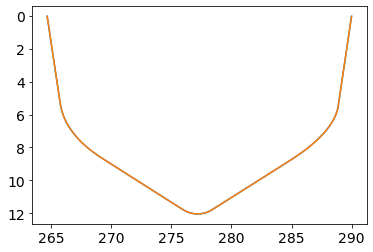

In [289]:
r = s2[34,:]
x = r[::4]*0.001
z = r[1::4]*0.001
plt.plot(x[x!=0], z[x!=0])
c = hi(x[x!=0])

plt.gca().invert_yaxis()
diff = c - z[x!=0]
#[np.argmin(diff[:1000])]

plt.plot(x[x!=0][:3575], z[x!=0][:3575])
np.where(abs(diff)<=0.007)[0][-1]

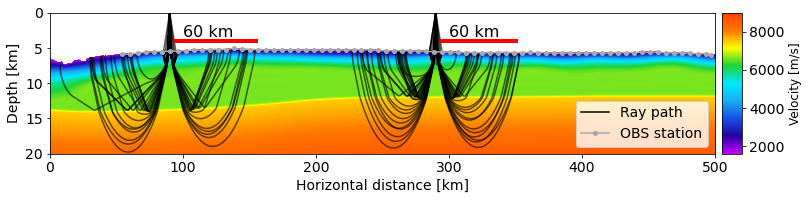

In [308]:
plt.rcParams.update({'font.size': 14})
file = 'vp41'


figsize=(12,3)
extent=[0, 500, 20, 0]
labels = ['Horizontal distance [km]','Depth [km]']
fig,ax1 = plt.subplots(1,1,figsize=figsize) 
im = ax1.imshow(vp2.T,extent=extent,aspect='auto',cmap=cmap_vp,vmin=1600,vmax=9000,label=None)
cbar = plt.colorbar(im,ax=ax1,pad=0.009,aspect=7)

for i in range(s1.shape[0]):
    r = s1[i,:]
    x = r[::4]*0.001
    z = r[1::4]*0.001
    if np.max(z)<19.9:
        c = hi(x[x!=0])
        diff = c - z[x!=0]
        idx = np.where(abs(diff)<=0.007)[0][-1]
        plt.plot(x[:idx],z[:idx],color='k',alpha=0.6)
            
for i in range(s2.shape[0]):
    r = s2[i,:]
    x = r[::4]*0.001
    z = r[1::4]*0.001
    if np.max(z)<19.9:
        c = hi(x[x!=0])
        diff = c - z[x!=0]
        idx = np.where(abs(diff)<=0.007)[0][-1]
        plt.plot(x[:idx],z[:idx],color='k',alpha=0.6)
for i in range(1):
    r = s2[i,:]
    x = r[::4]*0.001
    z = r[1::4]*0.001
    if np.max(z)<19.9:
        c = hi(x[x!=0])
        diff = c - z[x!=0]
        idx = np.where(abs(diff)<=0.007)[0][-1]
        plt.plot(x[:idx],z[:idx],color='k',label='Ray path')

plt.plot(df['sx']*0.001,df['sz']*0.001,'o-', color='darkgrey',ms=4,label='OBS station')
plt.legend(loc='lower right')

plt.plot([295,350],[4,4],linewidth=4,color='r')
plt.annotate(text='60 km',xy=[300,3.5],fontsize=16)

plt.plot([95,155],[4,4],linewidth=4,color='r')
plt.annotate(text='60 km',xy=[100,3.5],fontsize=16)

cbar.set_label('Velocity [m/s]',fontsize=12)
im.axes.set_xlabel(labels[0],fontsize=14)
im.axes.set_ylabel(labels[1],fontsize=14)
plt.tight_layout()
fig.savefig('ray_path_initial_vp'+ '.png',dpi=300,format='png', bbox_inches='tight')

In [305]:
155-95

60

Text(0, 0.5, 'Depth [km]')

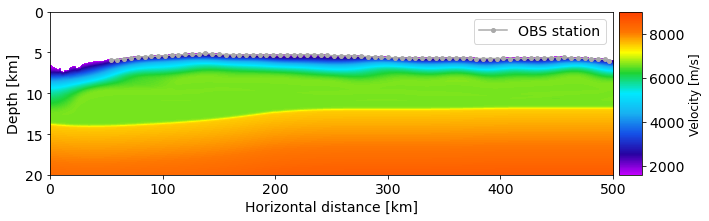

In [288]:
plt.rcParams.update({'font.size': 14})
file = 'vp41'


figsize=(12,3)
extent=[0, 500, 20, 0]
labels = ['Horizontal distance [km]','Depth [km]']
fig,ax1 = plt.subplots(1,1,figsize=figsize) 
im = ax1.imshow(vp2.T,extent=extent,aspect='auto',cmap=cmap_vp,vmin=1600,vmax=9000,label=None)
cbar = plt.colorbar(im,ax=ax1,pad=0.009,aspect=7)

#plt.plot(df['sx']*0.001,df['sz']*0.001,'o-', color='darkgrey',ms=4,label='OBS station')
#plt.legend()

cbar.set_label('Velocity [m/s]',fontsize=12)
im.axes.set_xlabel(labels[0],fontsize=14)
im.axes.set_ylabel(labels[1],fontsize=14)
#fig.savefig(file + '.png',dpi=300,format='png', bbox_inches='tight')

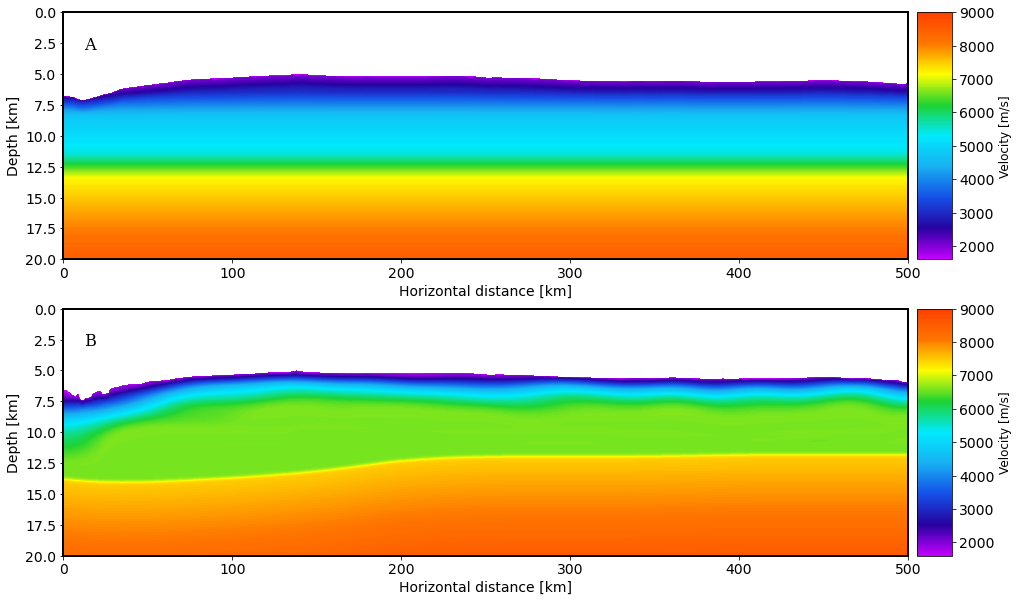

In [6]:

#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
#plt.rcParams.update({'font.size': 12})

figsize=(18,10)
extent=[0, 500, 20, 0]

labels = ['Horizontal distance [km]','Depth [km]']
fig,(ax1, ax2) = plt.subplots(2,1,figsize=figsize) 

ax0 = [ax1,ax2]
vpp = [vp0,vp2]
l = [' A ',' B ']
font = {'family': 'serif', 'color':  'black','weight': 'normal', 
        'size': 16} #'fontweight':'bold'}

for i in [0,1]:
    ax = ax0[i]
    vp = vpp[i]
#     levels=np.array([3000,4000,5000,6000,7000,7500,8000])
#     CS = ax.contour(vp.T, levels, colors='k', origin='upper', extent=extent,alpha=0.4)
#     ax.clabel(CS, inline=True, fontsize=12,fmt='%1.0f')

    im = ax.imshow(vp.T,extent=extent,aspect='auto',cmap=cmap_vp,vmin=1600,vmax=9000)
    ax.text(10,3,l[i],fontdict=font,bbox=dict(boxstyle="square",color='white'))
    cbar = plt.colorbar(im,ax=ax,pad=0.009,aspect=7)

    cbar.set_label('Velocity [m/s]',fontsize=12)
    im.axes.set_xlabel(labels[0],fontsize=14)
    im.axes.set_ylabel(labels[1],fontsize=14)


    # change all spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)

plt.ylim(0,20)
plt.gca().invert_yaxis()
plt.show()

In [62]:
rss = rs.RSSdata()
rss.read('mute.rss')
m = rss.data.squeeze()
rss.read('smth.rss')
vp = rss.data.squeeze()

vp = vp*m
vp[vp==0] = 1500.
rss.data = np.reshape(vp,(25001,1,1001))
rss.write('vp_ls_smth.rss')

In [40]:
vp[vp==0].shape

(7044726,)

In [42]:
vp.shape

(25001, 1001)